# DS 3000 - Assignment 6 (50 pts)

**Student Name**: Erika Sohn

**Date**: 06/10/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

Create a SVM classifier to predict the onset of diabetes using the Pima Indians Diabetes Database. Information on the Pima Indians Diabetes Database. can be obtained directly from kaggle.com. The link also contains the description of each field in the dataset.

## Question 1: 

(5 pts) Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print(f"Dataset rows: {df.shape[0]}")
print(f"Dataset columns: {df.shape[1]}")

Dataset rows: 768
Dataset columns: 9


From the table above, see 9 columns describing the number of pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, diabetes pedigree function, age, and outcomes (in binary). Right off the bat, we can see there are a couple of 0 values, especially in the insulin column. However, these are likely due to dataset errors, as it is illogical to have a fasting insulin level of 0. We will clean this in future steps. 

In [8]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

Given we are analyzing diabetes data for Pima Indians, the 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' are most meaninful. Particularly alarming is the significantly high average insulin (79.80 MU / mL), which is strongly indicative of insulin resistance. The average BMI of 31.99 in the dataset is also very high, which is in the range for Obesity Class I. The mean glucose levels (120.89 MU / mL) also signals prediabetes. Further, the diabetes pedigree function of 0.47 signals there is moderate genetic risk of diabetes across the dataset. 

Overall, the summary statistics demonstrates strong indicators of insulin resistance and diabetes within the dataset. We will analyze any patterns and relationships below. 

## Question 2: 
(5 pts) Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.

In [9]:
df['Outcome'].value_counts() # outcome is target variable (diabetes = 1, no diabetes = 0)

Outcome
0    500
1    268
Name: count, dtype: int64

The most notable features were BMI, Insulin, and Glucose (highest levels). Thus, I will first analyze pairwise patterns between Glucose vs Insulin, to see how blood sugar relates to insulin in this dataset. Second, I will explore the relationship between BMI vs Diabetes Outcome via a box plot. This will reveal whether body weight / obesity relate to diabetes status. 

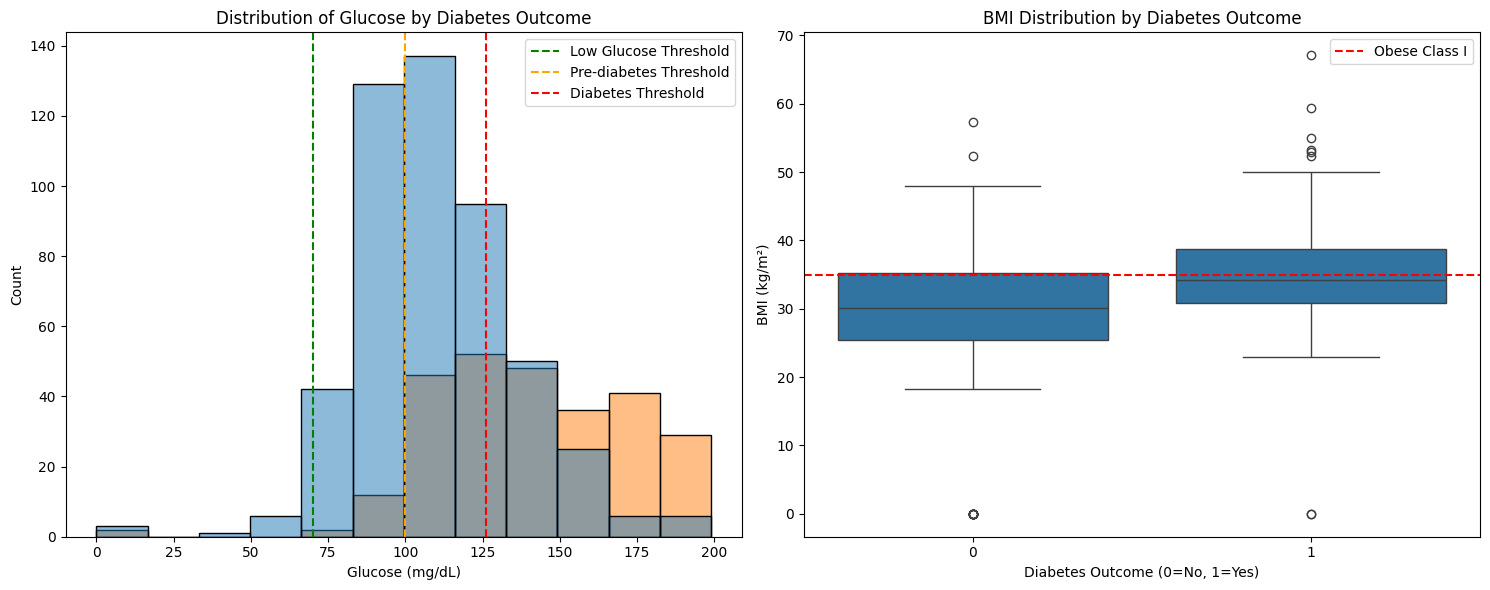

In [13]:
# GRAPH 1: Glucose distribution by outcome (Univariate)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(
    data=df, 
    x="Glucose", 
    hue="Outcome",
    bins=12,
    ax=axes[0]
)

# Add medical reference lines for glucose 
axes[0].axvline(x=70, color='green', linestyle='--', label='Low Glucose Threshold')
axes[0].axvline(x=100, color='orange', linestyle='--', label='Pre-diabetes Threshold')
axes[0].axvline(x=126, color='red', linestyle='--', label='Diabetes Threshold')

# Add labels graph 1 
axes[0].set_title('Distribution of Glucose by Diabetes Outcome')
axes[0].set_xlabel('Glucose (mg/dL)')
axes[0].set_ylabel('Count')
axes[0].legend(title='', loc='upper right')

# GRAPH 2: BMI vs Diabetes Outcome (Pairwise)
sns.boxplot(
    x='Outcome', 
    y='BMI',
    data=df,
    ax=axes[1]
)

# Add medical reference lines for BMI 
axes[1].axhline(y=35, color='red', linestyle='--', label='Obese Class I')
axes[1].set_title('BMI Distribution by Diabetes Outcome')
axes[1].set_xlabel('Diabetes Outcome (0=No, 1=Yes)')
axes[1].set_ylabel('BMI (kg/m²)')
axes[1].legend(loc='upper right')

# Adjust layout and display
plt.tight_layout()
plt.show()

Observed patterns:
1. Glucose Distribution visualization (left):
- The highest count for diabetic patients (blue) appears to be around 125-150 mg/dL   
- Non-diabetic patients (orange) have more spread distribution with peaks around 100 mg/dL and 175 mg/dL
- There's minimal overlap between groups in the 100-125 mg/dL range

2. BMI Distribution visualization (right):
- Diabetic group shows notably higher median BMI (~33 kg/m^2) compared to non-diabetic group (~30 kg/m^2)
- IQR for diabetic patients shifted upward (approximately 30-38 kg/m^2)
- Both groups display outliers, indicating BMI alone isn't perfectly predictive
- Visible upward shift in diabetic group's entire box confirms clinical relationship between higher BMI and diabetes risk

## Question 3:
(5 pts) Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

In [8]:
# Check Kaggle to see if categorical data has been cleaned 
print("Missing Values:")
print(df.isna().sum()) # check for any NaNs 

print("\nZero Values:")
print((df == 0).sum()) # count zero values per col)

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero Values:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
print("Datatypes:")
print(df.dtypes)

Datatypes:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


It seems the Kaggle dataset is cleaned to some extent as there are no missing values or datatype errors. However, there are a lot of illogical zero values. This will require cleaning. 

In [10]:
total_zeros = (df == 0).sum().sum()
percent_zeros = total_zeros / df.size * 100 
print(f"\nTotal Percentage of Zeros in Dataset: {percent_zeros:.2f}%")


Total Percentage of Zeros in Dataset: 18.27%


The total percentage of zeros in this dataset is 18.27%. We will need to clean these zeros which are logically not possible (i.e., insulin level of 0 is not possible). Dropping them would result in a substantial loss in data which will affect our model building and performance. Thus, the best approach is imputation. 

In [11]:
df_clean = df.copy()

# For columns where zeros are physiologically impossible, replace with median of non zero values
glucose_median = df_clean.loc[df_clean['Glucose'] > 0, 'Glucose'].median()
df_clean.loc[df_clean['Glucose'] == 0, 'Glucose'] = glucose_median

bp_median = df_clean.loc[df_clean['BloodPressure'] > 0, 'BloodPressure'].median()
df_clean.loc[df_clean['BloodPressure'] == 0, 'BloodPressure'] = bp_median

skin_median = df_clean.loc[df_clean['SkinThickness'] > 0, 'SkinThickness'].median()
df_clean.loc[df_clean['SkinThickness'] == 0, 'SkinThickness'] = skin_median

insulin_median = df_clean.loc[df_clean['Insulin'] > 0, 'Insulin'].median()
df_clean.loc[df_clean['Insulin'] == 0, 'Insulin'] = insulin_median

bmi_median = df_clean.loc[df_clean['BMI'] > 0, 'BMI'].median()
df_clean.loc[df_clean['BMI'] == 0, 'BMI'] = bmi_median

In [12]:
# Sanity check: keep Pregnancies and Outcome as those are valid, DPF and Age as originally had no zeros 
print("Zero values after cleaning:")
for column in df_clean.columns:
    print(f"{column}: {(df_clean[column] == 0).sum()}")

Zero values after cleaning:
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


## Question 4: 
(10 pts) Partition the data into train/test sets. After which, perform the following:
- Encode any categorical data
- Normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [13]:
# Set features and target  
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# Partition into 80/20 train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [14]:
# Z score feature scaling required as we have features with very different scales 
# By standardizing, all values have mean = 0 and stdev = 1 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [16]:
# Sanity check
print("Before scaling (training data):")
print(f"Mean: {X_train.mean().mean():.2f}")
print(f"Standard deviation: {X_train.std().mean():.2f}")

print("\nAfter scaling (training data):")
print(f"Mean: {X_train_scaled.mean().mean():.2f}")
print(f"Standard deviation: {X_train_scaled.std().mean():.2f}")

Before scaling (training data):
Mean: 54.45
Standard deviation: 20.35

After scaling (training data):
Mean: -0.00
Standard deviation: 1.00


After scaling mean of 0.00 and stdev of 1 demonstrates that the training set has been successfully scaled

In [17]:
# Sanity check: ensure scaling worked 
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.621306,0.832897,0.634372,-0.040079,-0.185794,-0.451970,-0.863909,1.443695
1,0.915660,-0.825765,0.296627,0.297027,-0.564901,1.225981,1.155234,-0.112505
2,0.621306,0.069912,-0.041118,-0.040079,-0.185794,-0.731628,-0.310320,-0.371872
3,2.976135,1.761747,-0.885480,0.072289,-0.185794,0.151504,-0.764846,0.406228
4,0.915660,1.264149,-1.560969,0.297027,0.371716,-0.304781,0.330678,0.492684


In [18]:
print("Data preprocessing complete. Time to build model!")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Data preprocessing complete. Time to build model!
Training set shape: (614, 8)
Test set shape: (154, 8)


## Question 5: 
(20 pts) Build the model that predicts the target variable. Ensure that you:
- Instantiate the correct SVM model, train and evaluate it.
- Use GridSearchCV to tune at least two hyperparameters.**
- Perform cross validation.
**You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
Display: 1) the best model/parameters and 2) the best score that was obtained.


In [19]:
# Train baseline SVM model 
from sklearn.svm import SVC 
svm_base= SVC(kernel='rbf', random_state=7)
svm_base.fit(X_train_scaled, y_train) 

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
X_test_scaled = scaler.transform(X_test)
y_pred = svm_base.predict(X_test_scaled)
print("The predicted diabetes outcomes are:", y_pred)

The predicted diabetes outcomes are: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [21]:
# Evaluate base model
y_pred_basic = svm_base.predict(X_test_scaled)
basic_accuracy = accuracy_score(y_test, y_pred_basic)

print(f"Baseline SVM Accuracy: {basic_accuracy:.4f}")
print("\nBaseline Classification Report:")
print(classification_report(y_test, y_pred_basic))

Baseline SVM Accuracy: 0.7532

Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [22]:
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create GridSearchCV obj 
svm_tuned = SVC(random_state=7)
svm_tuned_grid = GridSearchCV(svm_tuned, params, cv=5, n_jobs=-1)  # Changed svm to svm_tuned
svm_tuned_grid.fit(X_train_scaled, y_train)

print("Best Parameters:", svm_tuned_grid.best_params_)
print(f"Best Cross-Validation Score: {svm_tuned_grid.best_score_:.2f}")

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.77


C = 10 is a moderately high regularization parameter, indicating that the model needs some flexibility. Gamma = 0.001 is relatively low, meaning thate each training example had strong indluence and smoother decision boundaries. Kernel = 'rbf indicates that the data is not linearly separable. 

CV score of 0.77 means that:
- The model correctly classifies about 77% of the samples across the 5-fold cross-validation
- For medical diagnostics like diabetes prediction, this is a reasonable score, though not exceptional

Together, these results suggest:
- The diabetes prediction problem has non-linear relationships that require the flexibility of an rbf kernel
- The data likely has some inherent noise or overlapping classes that prevent higher accuracy


In [23]:
# Get best model and evaluate on test set 
best_model = svm_tuned_grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.7792

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       100
           1       0.75      0.56      0.64        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Overall 78% accuracy in our model is a good result for our dataset. The model is much better at identifying non-diabetic people (90% recall) than diabetic people (56% recall). This can be explained by a class imbalance of 100 non-diabetics vs 54 diabetics. However, the model has similar precision for both classes (79% vs 75%). Further, a lower recall for diabetes detection means the model is still missing almost half of actual diabetes cases. 

Compared to the svm_base model, there has been an improvement of 3% (Tuned=78%, Base=75%). In a medical context, this could mean correctly classifying several more patients, resulting in early detection and better prognostic outcomes. The most significant improvement is in precision for Class 1 (diabetes positive), which increased from 68% to 75%. Thus, resulting in lower false positive. Overall the **tuned model is more reliable** in predicting if someone has diabetes. 

In [24]:
# Calculate improvement svm_tuned - svm_base
improvement = (accuracy - basic_accuracy) * 100
print(f"\nAccuracy improvement after tuning: {improvement:.2f}%") 


Accuracy improvement after tuning: 2.60%


In [25]:
# Binary classfication problem -> display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives: {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives: {cm[1, 1]}")


Confusion Matrix:
[[90 10]
 [24 30]]

Confusion Matrix Interpretation:
True Negatives: 90
False Positives: 10
False Negatives: 24
True Positives: 30


There appears to be more negatives (90+10=100) than positives (24+30=54) in test set. This reflects a natural prevalance of diabetes in the sample population dataset. 

In [26]:
# Show CV results for best model
print("\nCross-Validation Results for Best Model:")
cv_results = svm_tuned_grid.cv_results_
best_index = svm_tuned_grid.best_index_
cv_scores = []

for i in range(5):  # 5-fold CV
    cv_scores.append(cv_results[f'split{i}_test_score'][best_index])

rounded_scores = [f"{score:.2f}" for score in cv_scores]
print(f"CV Scores: {rounded_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")


Cross-Validation Results for Best Model:
CV Scores: ['0.76', '0.76', '0.78', '0.79', '0.75']
Mean CV Score: 0.77
Standard Deviation: 0.02


CV results demonstrate high consistency across all five folds (scores from 0.75 to 0.79) with a low stdev (0.02), further indicating that the model with optimal parameters (C=10, gamma=0.001, kernel='rbf') performs reliably regardless of which data subset is encountered. Thue mean CV accuracy (0.77) aligns closely with the test set accuracy (0.78), confirming this isn't a split based off chance but rather a robust model. However, both models still struggle with diabetes recall (56%), suggesting room for improvement in detecting positive cases. 

## Question 6:
(5 pts) Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?

In [27]:
# Examine CV results 
cv_results = pd.DataFrame(svm_tuned_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
print("Top models by cross-validation score:")
print(cv_results[['params', 'mean_test_score', 'std_test_score']].head())

Top models by cross-validation score:
                                              params  mean_test_score  \
49        {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}         0.767067   
40   {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}         0.767013   
60  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}         0.767013   
44    {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}         0.767013   
48     {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}         0.767013   

    std_test_score  
49        0.015626  
40        0.030623  
60        0.030623  
44        0.030623  
48        0.030623  


In [28]:
# Calculate training and test scores for bias-var diagnosis 
best_model = svm_tuned_grid.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)
score_diff = train_score - test_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Cross-validation accuracy:
- Best model (rbf kernel): 76.7%
- Top linear model: 76.7%

Consistency (standard deviation):
- rbf model: 1.6%
- Linear models: 3.1%

Hyperparameter values:
- Best C value: 10 (appears in all top 5 models)
- Best gamma for rbf: 0.001

Performance difference:
- Between best and 5th best model: 0.0054%
- Between rbf and linear kernels: 0.0054%

These numbers demonstrate that while overall performance is similar across models (all ~76.7% accurate), **the rbf kernel provides significantly more consistent predictions (1/2 the stdev of linear models).**

In [29]:
# Calculate cross-validation standard deviation
best_index = svm_tuned_grid.best_index_
cv_results = svm_tuned_grid.cv_results_
cv_std = cv_results['std_test_score'][best_index]
print(f"Cross-validation standard deviation: {cv_std:.2f}")

print(f"\nBias-Variance Analysis:")
print(f"Training score: {train_score:.2f}")
print(f"Test score: {test_score:.2f}")
print(f"Difference (train - test): {score_diff:.2f}")

Cross-validation standard deviation: 0.02

Bias-Variance Analysis:
Training score: 0.77
Test score: 0.78
Difference (train - test): -0.01


Balanced generalization:
- Training score (0.77) is actually slightly lower than test score (0.78)
- Difference of -0.01 indicates no overfitting; the model performs marginally better on unseen data

Consistent performance:
- Cross validation stdev of 0.02 shows stable performance across different data subsets
- Low variability suggests reliable predictions regardless of which specific patients are in training/testing

Optimal complexity:
- The negative train-test difference (-0.01) is unusual but positive - it indicates the model isn't memorizing training data
- This suggests the hyperparam tuning successfully found an appropriate level of model complexity

Moderate predictive power:
- Both training and test scores around 77-78% show reasonable but not exceptional predictive ability
- The model has found genuine patterns in the data without overfitting to noise

In [30]:
# Extra: medically relevant metrics 
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # True Positives / (True Positives + False Negatives)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # True Negatives / (True Negatives + False Positives)

print("\nMedical Significance Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Medical Significance Metrics:
Sensitivity (Recall): 0.56
Specificity: 0.90


Finally, the model's medical significance metrics reveal a **substantial imbalance in its diagnostic capabilities.** With a sensitivity of only 56%, the model would miss 44% of patients with diabetes. In a medical setting, could have significant effects in leaving a serious condition like diabetes untreated. If progressed, could lead to complications like cardiovascular disease, neuropathy, and kidney damage. While the high specificity of 0.90 means few healthy patients would receive unnecessary interventions, this advantage doesn't outweigh the danger of missed diagnoses in a condition like diabetes where early detection is vital. These metrics suggest the model prioritizes avoiding false alarms over catching all cases, making it unsuitable for primary screening where the medical standard typically requires sensitivity values of at least 0.80 for serious but treatable conditions like diabetes.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
